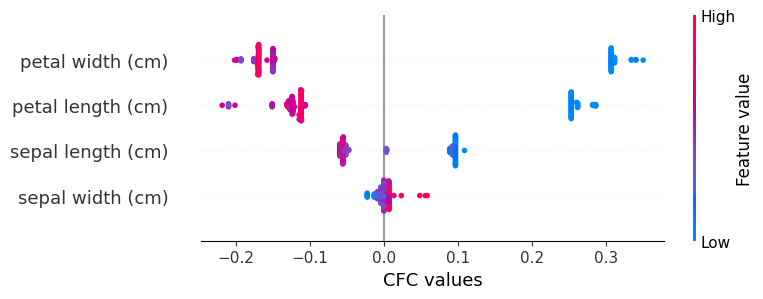

In [5]:
import numpy as np
import shap
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti
import matplotlib.pyplot as plt

# Load dataset and train the model
data = load_iris()
X, y = data.data, data.target
model = RandomForestClassifier()
model.fit(X, y)

# Use treeinterpreter to get the prediction, bias, and contributions
prediction, bias, contributions = ti.predict(model, X)

# Contributions.shape is (n_samples, n_features, n_classes)
# We reduce the dimensionality by selecting one class
shap_values = contributions[:, :, 0]  # Choose class 0 for visualization

# Creating a SHAP Explanation object
explainer = shap.Explainer(model)
shap_object = shap.Explanation(
    values=shap_values,
    base_values=bias[:, 0],  # Base values should match the selected class
    data=X,
    feature_names=data.feature_names
)

# Generate SHAP summary plot (beeswarm plot) and modify the x-axis label directly
shap.summary_plot(shap_object.values, shap_object.data, feature_names=shap_object.feature_names, show=False)
plt.gca().set_xlabel("CFC values")  # Modify the x-axis label
plt.show()  # Display the plot with the updated label

In [6]:
def compute_cfc(tree, instance):
    contribution = 0.0
    node = tree.root
    while not node.is_leaf():
        # Choose branch based on instance value
        if instance[node.feature] < node.threshold:
            next_node = node.left
        else:
            next_node = node.right
        # Accumulate the contribution from this node’s prediction shift
        contribution += next_node.prediction - node.prediction
        node = next_node
    return contribution

# Example of computing CFC for a single tree (pseudo-code)
cfc_value = compute_cfc(model, X.iloc[0])
print("CFC Value:", cfc_value)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'